# Data Analysis for Social Buzz

In this work, we focus on a small dataset extracted from a large enterprise data set. The company has a platform that collects users' comments and reactions to celebrity-related events. The platform focuses on content by preserving the anonymity of all users and only tracking user reactions to each piece of content. Users can react to content in over 100 different ways, beyond the traditional ‘like’ and comment reactions.

Here we try to analyse the top 5 most popular categories of content.

In [1]:
# Importing librairies 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sb
import re 

%matplotlib inline

In [2]:
# Load the content dataset
df_content = pd.read_csv("Data/FinalContentDataset.csv")

In [3]:
df_content.head(5)

,Unnamed: 0,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,7/11/20 9:43,photo,studying,negative,0
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17/6/21 12:22,photo,studying,negative,10
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18/4/21 5:13,photo,studying,negative,15
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,6/1/21 19:13,photo,studying,negative,0
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,23/8/20 12:25,photo,studying,positive,30


In [4]:
df_content.shape

(24573, 8)

In [5]:
df_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     24573 non-null  int64 
 1   Content ID     24573 non-null  object
 2   Reaction Type  24573 non-null  object
 3   Datetime       24573 non-null  object
 4   Content Type   24573 non-null  object
 5   Category       24573 non-null  object
 6   Sentiment      24573 non-null  object
 7   Score          24573 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 1.5+ MB


### Data cleaning
- Remove irrelevant column as ‘Unnamed: 0‘
- Change the type of the coloumn ‘Datetime‘ to DataTime

In [6]:
# Copy of the dataset
df_content = df_content.copy()

In [7]:
# Remove column ‘Unnamed: 0‘
df_content = df_content.drop("Unnamed: 0", axis = 1)

In [8]:
# Change the type of the column Datetime to Datetime
df_content['Datetime'] = pd.to_datetime(df_content['Datetime'])

In [9]:
# Make a copy a the cleaned dataset
df_cleaned = df_content.copy()

In [21]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Content ID     24573 non-null  object        
 1   Reaction Type  24573 non-null  object        
 2   Datetime       24573 non-null  datetime64[ns]
 3   Content Type   24573 non-null  object        
 4   Category       24573 non-null  object        
 5   Sentiment      24573 non-null  object        
 6   Score          24573 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.3+ MB


### Data visualisation

In [23]:
# Find the top 5 categories
df_cleaned['Category'] = df_cleaned['Category'].str.capitalize()
df_top_five = df_cleaned.groupby(['Category'])['Score'].sum().reset_index(name = 'Total Score')
df_top_five = df_top_five.sort_values(by = 'Total Score', ascending = False)
df_top_five = df_top_five[:5]
df_top_five

,Category,Total Score
0,Animals,74965
9,Science,71168
7,Healthy eating,69339
12,Technology,68738
6,Food,66676


#### Result :
The top 5 categories are :
1. Animal with a total score of 74965
2. Science with a total score of 71168
3. Healthy eating with a total score of 69339
4. Technology with a total score of	68738
5. Food	with a total score of 66676

Now it could be nice to know the number of reactions there are to these most popular category.

Now we try to show this on a bar chart diagram.

<function matplotlib.pyplot.show(close=None, block=None)>

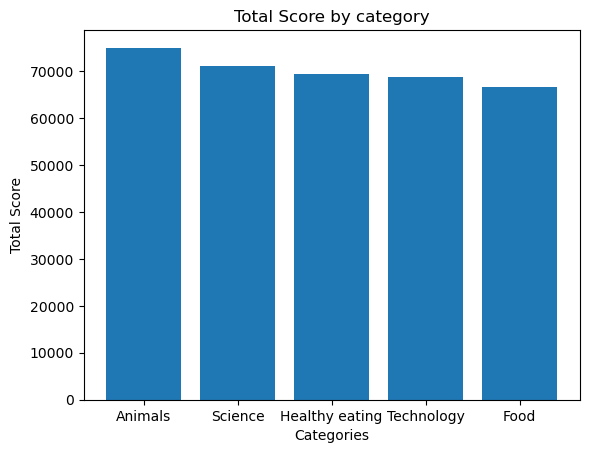

In [24]:
# Create a bar chart
plt.bar(df_top_five['Category'], df_top_five['Total Score'])

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Total Score')
plt.title('Total Score by category')

# Display the plot
plt.show

Let's plot with a pie chart.

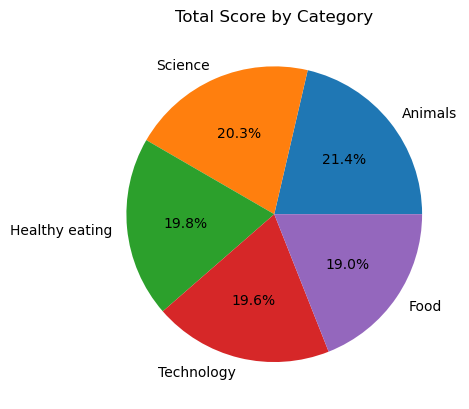

In [35]:
# Creat the pie chart
plt.pie(df_top_five['Total Score'], labels = df_top_five['Category'], autopct = '%1.1f%%')

# Define label and title
plt.title('Total Score by Category')

# plot the chart
plt.show()

Let's highlight the category with the highest score share.

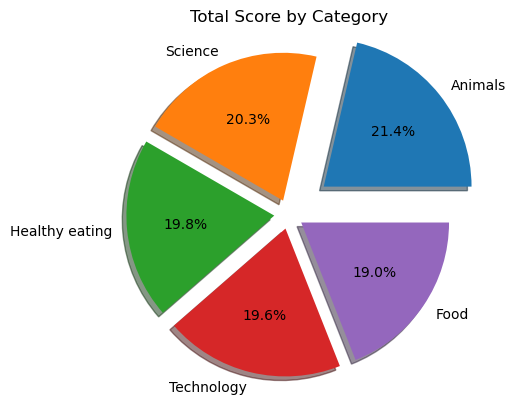

In [72]:
# Fin the category with the biggest Total Score
max_score = max(df_top_five['Total Score'])
max_index = df_top_five['Total Score'].idxmax()

# Create a list of heights to highlight the relief effect
height = [0.1] * df_top_five.shape[0]
height[max_index] = 0.3

# Create and plot the chart
plt.pie(df_top_five['Total Score'], labels=df_top_five['Category'], explode=height, autopct='%1.1f%%', shadow = True)

plt.title('Total Score by Category')

plt.show()

In [12]:
# Dataset with only the top 5 categories
df_with_top_cat = df_cleaned.copy()
df_with_top_cat = df_with_top_cat[df_with_top_cat['Category'].isin(['Animals', 'Science', 'Healthy eating', 'Technology', 'Food'])]

In [13]:
# Check the total number of reaction for the top 5 categories
df_with_top_cat_react = df_with_top_cat.groupby('Category')['Reaction Type'].count().reset_index(name = 'Number of reactions').sort_values(by = 'Number of reactions', ascending = False)
df_with_top_cat_react

,Category,Number of reactions
0,Animals,1897
3,Science,1796
2,Healthy eating,1717
1,Food,1699
4,Technology,1698


#### Interpretation 
The most popular category ‘Animals’ also has more reactions than the other categories. But we can see that the number of interactions from the ‘Food’ category is greater than that from the ‘Technology’ category, even though the ‘Technology’ category is more popular than the ‘Food’ category.


Let's visualise a plot with 'Category', 'Total Score' and 'Number of reactions'💃



In [27]:
# Merge the datasets df_top_five and df_with_top_cat_react
df_five = pd.merge(df_top_five, df_with_top_cat_react, on = 'Category', how = 'inner')
df_five

,Category,Total Score,Number of reactions
0,Animals,74965,1897
1,Science,71168,1796
2,Healthy eating,69339,1717
3,Technology,68738,1698
4,Food,66676,1699


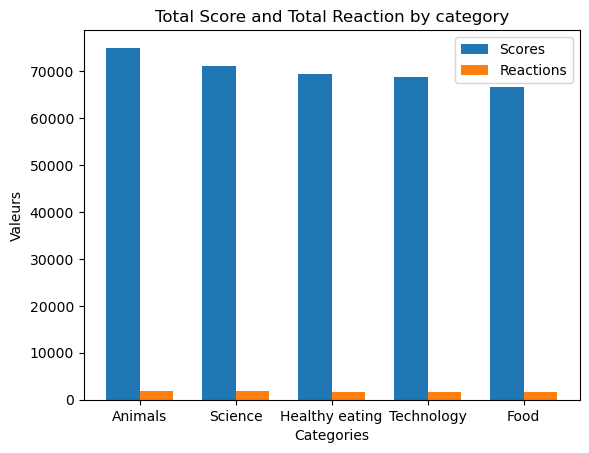

In [34]:
# Visualisation of df_five

# Define the values
x = np.arange(len(df_five['Total Score']))
width = 0.35

# Create the barchart
plt.bar(x - width/2, df_five['Total Score'], width, label = 'Scores')
plt.bar(x + width/2, df_five['Number of reactions'], width, label = 'Reactions')

# Define labels and title
plt.xticks(x, df_five['Category'])
plt.xlabel('Categories')
plt.ylabel('Valeurs')
plt.title('Total Score and Total Reaction by category')
plt.legend()

# Show the plot
plt.show()

Now, let's check from the initial dataset which month has the most posts. 😊

In [14]:
# Create columns month and year
df_content_month_year = df_cleaned.copy()
df_content_month_year['Month'] = df_content_month_year['Datetime'].dt.month
df_content_month_year['Year'] = df_content_month_year['Datetime'].dt.year


In [15]:
# Change number of the month by its respective name
df_content_month_year['Month'] = pd.to_datetime(df_content_month_year['Month'], format='%m').dt.month_name()

In [16]:
#df_content_month_year.groupby(['Month'])['Year'].count().reset_index(name = "Total Posts")
df_content_month_year.groupby(['Month', 'Year'])['Content ID'].count().reset_index(name = "Total Posts").sort_values(by = "Total Posts", ascending = False)

,Month,Year,Total Posts
9,January,2021,1708
10,July,2020,1703
17,May,2021,1703
4,December,2020,1695
20,October,2020,1686
2,August,2020,1665
18,November,2020,1608
22,September,2020,1608
15,March,2021,1587
1,April,2021,1582


#### Interpretation
January 2021 has the highest number of messages, with a total of 1,705.